In [36]:
import pandas as pd
from sklearn import svm
from sklearn.datasets import make_classification
# from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# 生成数据集
X, y = make_classification(n_samples=1000, n_features=10, 
                           n_informative=5, n_redundant=5, random_state=1)

# 未选特征

In [39]:
mlpr=svm.SVC(kernel='linear',gamma=0.1, C=0.01)
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=62)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
mlpr.fit(X_train_scaled, y_train)
print('特征形态：{}'.format(X_train_scaled.shape))
print('模型准确率：{:.2f}'.format(mlpr.score(X_test_scaled,y_test)))

特征形态：(750, 10)
模型准确率：0.79


# 保留50%的特征

In [40]:
from sklearn.feature_selection import SelectPercentile
select = SelectPercentile(percentile=50)
select.fit(X_train_scaled, y_train)
X_train_selected = select.transform(X_train_scaled)
print('经过缩放的特征形态：{}'.format(X_train_scaled.shape))
print('特征选择后的特征形态:{}'.format(X_train_selected.shape))

经过缩放的特征形态：(750, 10)
特征选择后的特征形态:(750, 5)


[ True  True False  True False  True  True False False False]


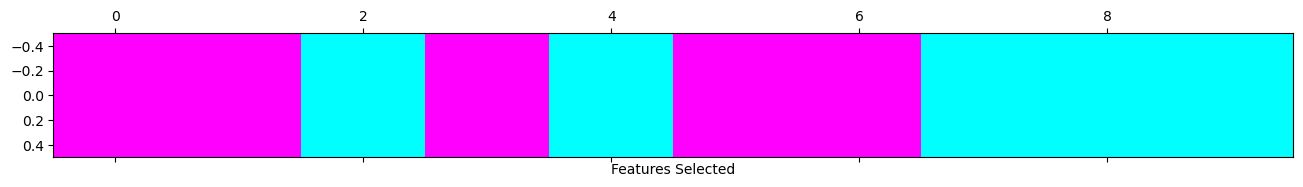

In [41]:
import matplotlib.pyplot as plt
mask = select.get_support()
print(mask)

plt.matshow(mask.reshape(1,-1),cmap=plt.cm.cool)
plt.xlabel("Features Selected")
plt.show()

In [24]:
X_test_selected = select.transform(X_test_scaled)
mlpr_sp=MLPRegressor(random_state=62, hidden_layer_sizes=(100,100),
                      alpha=0.001)
mlpr_sp.fit(X_train_selected, y_train)
print('特征选择后模型得分：{:.2f}'.format(mlpr_sp.score(X_test_selected, 
                                              y_test)))

特征选择后模型得分：0.74


D:\liuchaochao\DownLoad\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# 随机森林模型进行特征选择

In [44]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
sfm = SelectFromModel(RandomForestRegressor(n_estimators=100, 
                                            random_state=38),
                     threshold='median')
sfm.fit(X_train_scaled, y_train)
X_train_sfm = sfm.transform(X_train_scaled)
print('基于随机森林模型进行特征后的数据形态：{}'.format(X_train_sfm.shape))

基于随机森林模型进行特征后的数据形态：(750, 5)


[False False  True  True  True False  True False  True False]


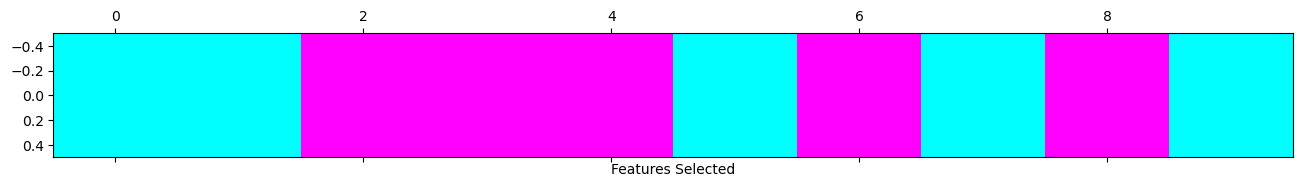

In [45]:
mask_sfm = sfm.get_support()
print(mask_sfm)

plt.matshow(mask_sfm.reshape(1,-1),cmap=plt.cm.cool)
plt.xlabel('Features Selected')
plt.show()

In [46]:
X_test_sfm = sfm.transform(X_test_scaled)
mlpr_sfm=svm.SVC(kernel='linear',gamma=0.1, C=0.01)
mlpr_sfm.fit(X_train_sfm, y_train)
print('随机森林进行特征选择后的模型得分：{:.2f}'.format(
    mlpr_sfm.score(X_test_sfm, y_test)))

随机森林进行特征选择后的模型得分：0.78


# RFE特征选择

基于RFE进行特征后的数据形态：(750, 5)
[ True  True  True  True  True  True  True  True  True  True]


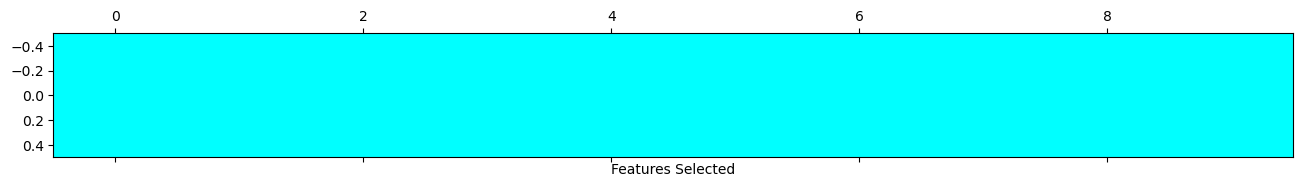

In [47]:
from sklearn.feature_selection import RFE
rfe = RFE(RandomForestRegressor(n_estimators=100,
                                 random_state=38),
         n_features_to_select=12)
rfe.fit(X_train_scaled, y_train)
print('基于RFE进行特征后的数据形态：{}'.format(X_train_sfm.shape))
mask = rfe.get_support()
print(mask)

plt.matshow(mask.reshape(1,-1), cmap=plt.cm.cool)
plt.xlabel('Features Selected')
plt.show()

In [48]:
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)
mlpr_rfe = svm.SVC(kernel='linear',gamma=0.1, C=0.01)
mlpr_rfe.fit(X_train_rfe, y_train)
print("RFE选择特征后的模型得分：{:.2f}".format(mlpr_rfe.score(X_test_rfe,
                                                  y_test)))

RFE选择特征后的模型得分：0.79


In [49]:
print('{:.2f}'.format(rfe.score(X_test_scaled, y_test)))

0.74


# 股票分析

In [52]:
import pandas as pd
stock = pd.read_csv('stock_basics_gbk.csv',encoding='GBK')
print(stock.head())
stock.describe()

     code  name industry area      pe  outstanding  totals  totalAssets  \
0  603801   N志邦     家居用品   安徽   66.46         0.40    1.60    135133.98   
1     611  天首发展       纺织   内蒙    0.00         3.19    3.22     37911.71   
2     721  西安饮食     酒店餐饮   陕西    0.00         4.36    4.99    113939.20   
3     916  华北高速       路桥   北京   28.55        10.90   10.90    590732.56   
4  300666  江丰电子      元器件   浙江  108.87         0.55    2.19     65224.55   

   liquidAssets  fixedAssets  ...  bvps     pb  timeToMarket       undp  \
0      66705.24     35142.68  ...  5.30   6.37      20170630   33919.01   
1      16025.70      3742.10  ...  0.60  16.19      19961008  -26733.13   
2      48945.06     32526.75  ...  1.33   6.08      19970430    5924.49   
3     155702.20    351282.44  ...  4.36   1.48      19990927  144005.38   
4      29357.46     24424.86  ...  1.82  10.47      20170615    9325.46   

   perundp     rev  profit    gpr    npr  holders  
0     2.12    0.00    0.00  37.49   7.15    38

,code,pe,outstanding,totals,totalAssets,liquidAssets,fixedAssets,reserved,reservedPerShare,esp,bvps,pb,timeToMarket,undp,perundp,rev,profit,gpr,npr,holders
count,3298.000000,3298.000000,3298.000000,3298.000000,3.298000e+03,3.298000e+03,3.298000e+03,3.298000e+03,3298.000000,3298.000000,3298.000000,3298.000000,3.298000e+03,3.298000e+03,3298.000000,3298.000000,3298.000000,3298.000000,3298.000000,3.298000e+03
mean,298613.660703,134.324163,13.019330,17.871771,6.321253e+06,7.887965e+05,3.727358e+05,2.298195e+05,1.818742,0.085851,4.432756,10.972135,1.994476e+07,3.428127e+05,1.315409,114.753745,188.183511,28.803614,0.923808,5.424152e+04
std,268243.503175,537.297937,88.147917,117.963100,8.190186e+07,3.901314e+06,2.282775e+06,8.162952e+05,1.759839,0.171696,3.093512,317.805557,1.560038e+06,3.202517e+06,1.897981,2635.129611,3195.858965,21.291972,247.415774,7.396764e+04
min,1.000000,0.000000,0.000000,0.000000,5.205730e+03,0.000000e+00,0.000000e+00,-1.691403e+05,-1.190000,-0.957000,-0.740000,-889.570000,0.000000e+00,-1.898306e+06,-7.630000,-99.870000,-4676.720000,-395.490000,-12847.610000,0.000000e+00
25%,2361.250000,20.482500,1.690000,2.980000,1.596649e+05,8.019696e+04,1.802172e+04,2.805321e+04,0.630000,0.013000,2.550000,2.350000,1.999072e+07,1.966508e+04,0.470000,0.000000,-5.255000,15.662500,2.000000,1.930700e+04
50%,300316.500000,45.380000,4.250000,5.865000,3.675306e+05,1.806788e+05,4.934173e+04,7.338914e+04,1.420000,0.050000,3.780000,3.640000,2.009103e+07,4.734846e+04,1.010000,11.180000,12.170000,26.400000,6.595000,3.408600e+04
75%,600586.750000,95.785000,8.850000,11.517500,9.322048e+05,4.249769e+05,1.471148e+05,1.700814e+05,2.450000,0.119000,5.560000,5.657500,2.012101e+07,1.230218e+05,1.847500,36.342500,66.045000,38.675000,13.925000,5.968075e+04
max,603999.000000,16007.990000,2940.550000,3564.060000,2.490494e+09,1.083595e+08,6.717090e+07,1.519980e+07,21.370000,4.874000,62.900000,18177.910000,2.017063e+07,1.016221e+08,54.800000,139513.000000,168145.580000,99.720000,3459.740000,1.006581e+06


In [57]:
y = stock['perundp']
print(y.shape)
features = stock.drop(['code','name','industry','area','perundp'],axis=1)
X = features.values
print(X.shape)
print(X[:1])

(3298,)
(3298, 18)
[[6.6460000e+01 4.0000000e-01 1.6000000e+00 1.3513398e+05 6.6705240e+04
  3.5142680e+04 1.3118870e+04 8.2000000e-01 1.2700000e-01 5.3000000e+00
  6.3700000e+00 2.0170630e+07 3.3919010e+04 0.0000000e+00 0.0000000e+00
  3.7490000e+01 7.1500000e+00 3.8648000e+04]]


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
mlpr=MLPRegressor(random_state=62, hidden_layer_sizes=(100,100),alpha=0.001)
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=62)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
mlpr.fit(X_train_scaled, y_train)
print('模型准确率：{:.2f}'.format(mlpr.score(X_test_scaled,y_test)))

模型准确率：0.92


In [59]:
wanted = stock.loc[:,'name']
print(wanted[y>=9])

518      张 裕Ａ
706      长春高新
781      大商股份
874      吉林敖东
968      洋河股份
1070     步长制药
1093     云南白药
1097      吉比特
1147    五 粮 液
1190     欧亚集团
1356     国药一致
1363     江铃汽车
1376     亿联网络
1400     海螺水泥
1633     中国神华
2129     兴业银行
2162     丽珠集团
2201     贵州茅台
2248     东阿阿胶
2627     中国平安
2878     重庆百货
Name: name, dtype: object


In [60]:
from sklearn.feature_selection import SelectPercentile
select = SelectPercentile(percentile=50)
select.fit(X_train_scaled, y_train)
X_train_selected = select.transform(X_train_scaled)
print('经过缩放的特征形态：{}'.format(X_train_scaled.shape))
print('特征选择后的特征形态:{}'.format(X_train_selected.shape))

经过缩放的特征形态：(2473, 18)
特征选择后的特征形态:(2473, 9)


In [61]:
mask = select.get_support()
print(mask)

plt.matshow(mask.reshape(1,-1),cmap=plt.cm.cool)
plt.xlabel("Features Selected")
plt.show()

[False False  True  True  True False  True False  True  True  True False
  True  True False False False False]


In [63]:
X_test_selected = select.transform(X_test_scaled)
mlpr_sp=MLPRegressor(random_state=62, hidden_layer_sizes=(100,100),
                      alpha=0.001)
mlpr_sp.fit(X_train_selected, y_train)
print('特征选择后模型得分：{:.2f}'.format(mlpr_sp.score(X_test_selected, 
                                              y_test)))

特征选择后模型得分：0.91


In [65]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
sfm = SelectFromModel(RandomForestRegressor(n_estimators=100, 
                                            random_state=38),
                     threshold='median')
sfm.fit(X_train_scaled, y_train)
X_train_sfm = sfm.transform(X_train_scaled)
print('基于随机森林模型进行特征后的数据形态：{}'.format(X_train_sfm.shape))

基于随机森林模型进行特征后的数据形态：(2473, 9)


[False False  True False False  True  True  True  True  True  True  True
  True False False False False False]


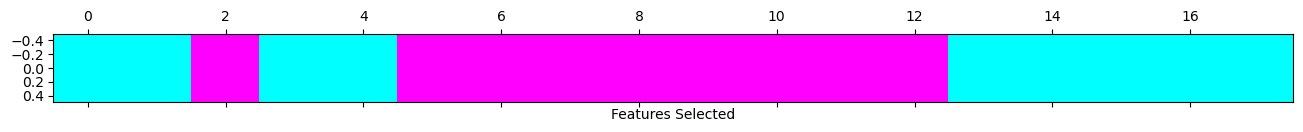

In [66]:
mask_sfm = sfm.get_support()
print(mask_sfm)

plt.matshow(mask_sfm.reshape(1,-1),cmap=plt.cm.cool)
plt.xlabel('Features Selected')
plt.show()

In [67]:
X_test_sfm = sfm.transform(X_test_scaled)
mlpr_sfm=MLPRegressor(random_state=62, hidden_layer_sizes=(100,100),
                      alpha=0.001)
mlpr_sfm.fit(X_train_sfm, y_train)
print('随机森林进行特征选择后的模型得分：{:.2f}'.format(
    mlpr_sfm.score(X_test_sfm, y_test)))

随机森林进行特征选择后的模型得分：0.95


[ True False  True False False  True  True  True  True  True  True  True
  True  True False  True False False]


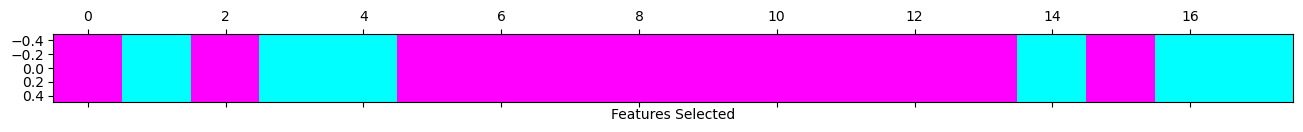

In [68]:
from sklearn.feature_selection import RFE
rfe = RFE(RandomForestRegressor(n_estimators=100,
                                 random_state=38),
         n_features_to_select=12)
rfe.fit(X_train_scaled, y_train)
mask = rfe.get_support()
print(mask)

plt.matshow(mask.reshape(1,-1), cmap=plt.cm.cool)
plt.xlabel('Features Selected')
plt.show()

In [69]:
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)
mlpr_rfe = MLPRegressor(random_state=62, hidden_layer_sizes=(100,100),
                      alpha=0.001)
mlpr_rfe.fit(X_train_rfe, y_train)
print("RFE选择特征后的模型得分：{:.2f}".format(mlpr_rfe.score(X_test_rfe,
                                                  y_test)))

print('{:.2f}'.format(rfe.score(X_test_scaled, y_test)))

RFE选择特征后的模型得分：0.93
0.90
